# 1. Importing Library

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. Configuration

In [2]:
class CFG:
  data_path = './data/df.csv'
  bins= [0,31,61,121,201,500]
  neighbors = 3

# 3. Data Preprocessing

In [3]:
df = pd.read_csv(CFG.data_path, header=0, dtype={'date_ori': str})

In [4]:
df = df[['name','volumn','count','year','month','category1','category2','category3','item1','item2','kind']]
df = df.loc[df['kind'] == 's'] #수주데이터만 선택
df = df.loc[df['item2'] == 'UPS'] #UPS만 선택
df = df.reset_index(drop=True)
df

,name,volumn,count,year,month,category1,category2,category3,item1,item2,kind
0,1011부대,10.0,1.0,2013,1,공공기관,군부대,병무청,장비,UPS,s
1,1포병여단,5.0,1.0,2013,5,공공기관,군부대,병무청,장비,UPS,s
2,2003부대,20.0,1.0,2014,12,공공기관,군부대,병무청,장비,UPS,s
3,2003부대,5.0,1.0,2019,8,공공기관,군부대,병무청,장비,UPS,s
4,21세기엔지니어링,3.0,1.0,2014,2,민간기업,건축및부동산,건축,장비,UPS,s
...,...,...,...,...,...,...,...,...,...,...,...
4856,효승,3.0,1.5,2012,6,정보통신,정보통신,정보통신,장비,UPS,s
4857,후지쯔코리아테크놀로지,5.0,3.0,2011,9,민간기업,건축및부동산,시공,장비,UPS,s
4858,후지쯔코리아테크놀로지,3.0,3.0,2011,9,민간기업,건축및부동산,시공,장비,UPS,s
4859,힐네트윅스,10.0,3.5,2013,8,정보통신,정보통신,IT기업,장비,UPS,s


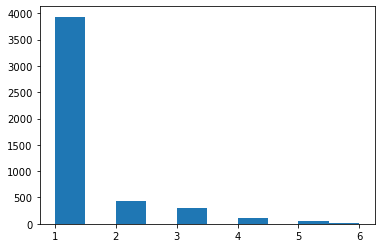

In [5]:
# volumn을 카테고리화 - 성신전기공업의 표 이용
df['vol_category']=np.digitize(df['volumn'], CFG.bins)
plt.hist(df['vol_category'])
plt.show()

In [6]:
# 이상치 제거
df_before = df.copy()
df = df[df['count']<50]
df = df.reset_index(drop=True)

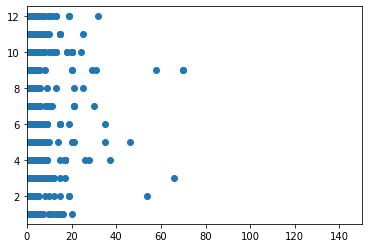

In [7]:
#전
plt.xlim([0,150])
plt.scatter(df_before['count'],df_before['month'])
plt.show()

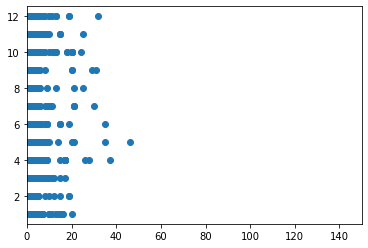

In [8]:
#후
plt.xlim([0,150])
plt.scatter(df['count'],df['month'])
plt.show()

In [9]:
print(df_before.shape)
print(df.shape)

(4861, 12)
(4855, 12)


In [10]:
# count 컬럼 정규화
count_scaler = StandardScaler()
count_scaler.fit(df['count'].values.reshape(-1,1))
count_normal = count_scaler.transform(df['count'].values.reshape(-1,1))
df['count_normal']=count_normal

In [11]:
# category1에 대한 one-hot-encoding
category1_dummy=pd.get_dummies(df['category1'])
df = pd.concat([df,category1_dummy],axis=1)

In [12]:
df

,name,volumn,count,year,month,category1,category2,category3,item1,item2,kind,vol_category,count_normal,공공기관,교육기관,금융기관,대리점,민간기업,의료기관,정보통신
0,1011부대,10.0,1.0,2013,1,공공기관,군부대,병무청,장비,UPS,s,1,-0.282345,1,0,0,0,0,0,0
1,1포병여단,5.0,1.0,2013,5,공공기관,군부대,병무청,장비,UPS,s,1,-0.282345,1,0,0,0,0,0,0
2,2003부대,20.0,1.0,2014,12,공공기관,군부대,병무청,장비,UPS,s,1,-0.282345,1,0,0,0,0,0,0
3,2003부대,5.0,1.0,2019,8,공공기관,군부대,병무청,장비,UPS,s,1,-0.282345,1,0,0,0,0,0,0
4,21세기엔지니어링,3.0,1.0,2014,2,민간기업,건축및부동산,건축,장비,UPS,s,1,-0.282345,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,효승,3.0,1.5,2012,6,정보통신,정보통신,정보통신,장비,UPS,s,1,-0.087321,0,0,0,0,0,0,1
4851,후지쯔코리아테크놀로지,5.0,3.0,2011,9,민간기업,건축및부동산,시공,장비,UPS,s,1,0.497751,0,0,0,0,1,0,0
4852,후지쯔코리아테크놀로지,3.0,3.0,2011,9,민간기업,건축및부동산,시공,장비,UPS,s,1,0.497751,0,0,0,0,1,0,0
4853,힐네트윅스,10.0,3.5,2013,8,정보통신,정보통신,IT기업,장비,UPS,s,1,0.692775,0,0,0,0,0,0,1


# 4. KNN 분석

In [13]:
x = df.loc[:,['count_normal','month','공공기관','교육기관','금융기관','대리점','민간기업','의료기관','정보통신']]
y = df.loc[:,'vol_category']
x = x.values.reshape(x.shape[0],x.shape[1])
y = y.values.reshape(-1)

print(x.shape)
print(y.shape)

(4855, 9)
(4855,)


In [14]:
#train, test dataset 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [15]:
#model
classifier = KNeighborsClassifier(n_neighbors = CFG.neighbors)
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)
print(confusion_matrix(y_test, guesses))
print(accuracy_score(y_test, guesses))

[[742   6   3  19   2   0]
 [ 88   0   0   2   0   0]
 [ 58   1   1   2   1   0]
 [ 27   0   0   0   0   0]
 [ 10   0   1   0   0   0]
 [  8   0   0   0   0   0]]
0.7651905252317199


In [16]:
#예측
np.set_printoptions(threshold=sys.maxsize)
guesses

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
#실제
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 5, 1, 1, 3, 2, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 4, 5, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 4, 1, 1, 2, 1, 3, 3,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 3, 2, 1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1,

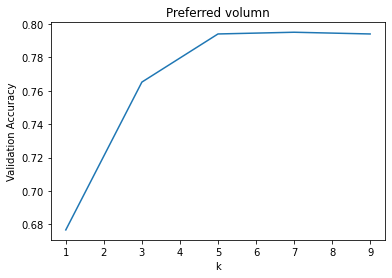

In [18]:
# neighbor 파라미터 정하기
k_list = range(1,10,2)
accuracy_list = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  guesses = classifier.predict(x_test)
  accuracy_list.append(accuracy_score(y_test, guesses))

plt.plot(k_list, accuracy_list)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Preferred volumn")
plt.show()